## Analyse Prédictive du Churn Client dans une Banque

Ce notebook explore un ensemble de données client d’une institution bancaire afin d’identifier les facteurs influençant le désabonnement des clients (churn). Grâce à une combinaison d’exploration de données, de visualisations, de prétraitement et de modélisation (régression logistique, Random Forest), ce projet a pour objectif de :


*   Comprendre les caractéristiques des clients qui quittent la banque.
*   Visualiser les tendances démographiques et comportementales.
*   Construire un modèle de prédiction pour anticiper le churn.

Ce travail constitue une base solide pour affiner les stratégies de fidélisation client à l’aide de l’analyse de données.



In [208]:
#importation des bibliothèques nécéssaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [209]:
#Chargment et visualisation du dataset
df = pd.read_csv('Churn_Modelling.csv')

In [210]:
#Dimmension de mon dataset
df.shape

(10000, 14)

In [211]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [212]:
#Suppression de la colonne RowNumber
df.drop('RowNumber', axis=1, inplace=True)

In [213]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [214]:
#vérification des valeurs manquantes
df.isna().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [215]:
#statistiques descriptives et types de données
df.describe()
df.dtypes

,0
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64


In [216]:
#compter le nombre de clients dans chaque catégorie de la colonne Exited
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<ipython-input-217-367aa949e3df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette=colors)


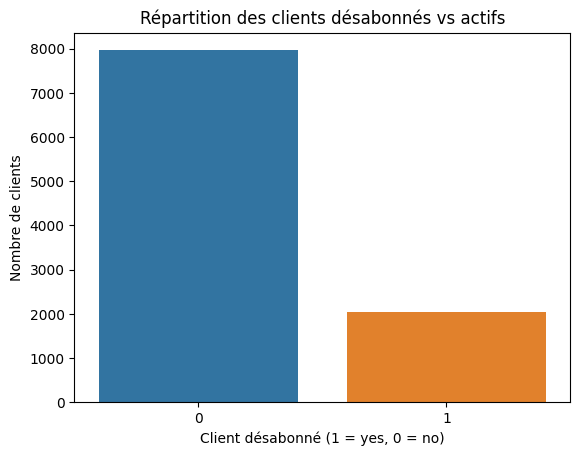

In [217]:
#analyse de la variable cible
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#1f77b4", "#ff7f0e"]

sns.countplot(x='Exited', data=df, palette=colors)
plt.title("Répartition des clients désabonnés vs actifs")
plt.xlabel("Client désabonné (1 = yes, 0 = no)")
plt.ylabel("Nombre de clients")
plt.show()


In [218]:
#pourcentage de churn
numR = df[df.Exited == 0].shape[0]
numD = df[df.Exited == 1].shape[0]
print(numR/(numR + numD) * 100,'% de client restent dans la banque')
print(numD/(numR + numD) * 100, '% ont quitté la banque')

79.63 % de client restent dans la banque
20.369999999999997 % ont quitté la banque


#### Analyse visuelle par attributs catégoriels

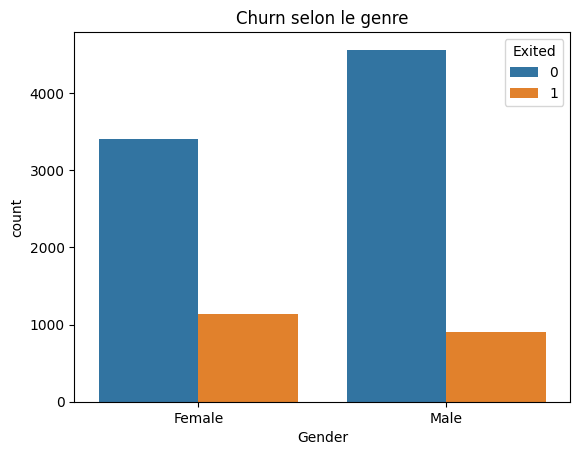

In [219]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Churn selon le genre")
plt.show()

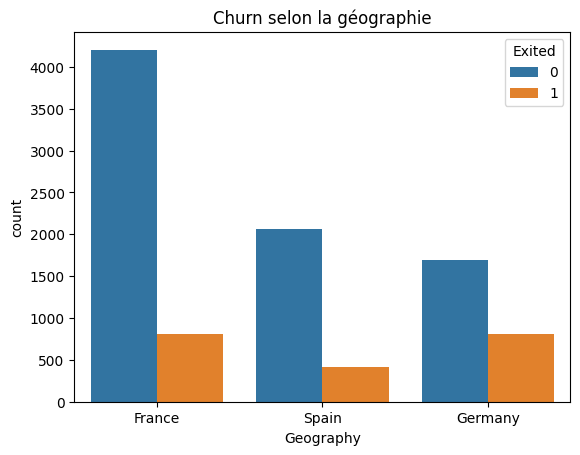

In [220]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Churn selon la géographie")
plt.show()

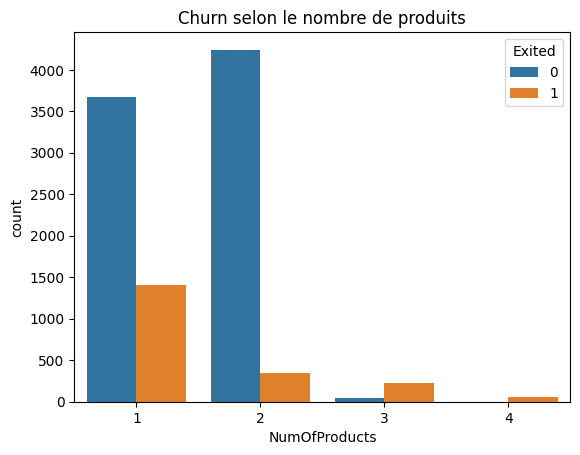

In [221]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title("Churn selon le nombre de produits")
plt.show()

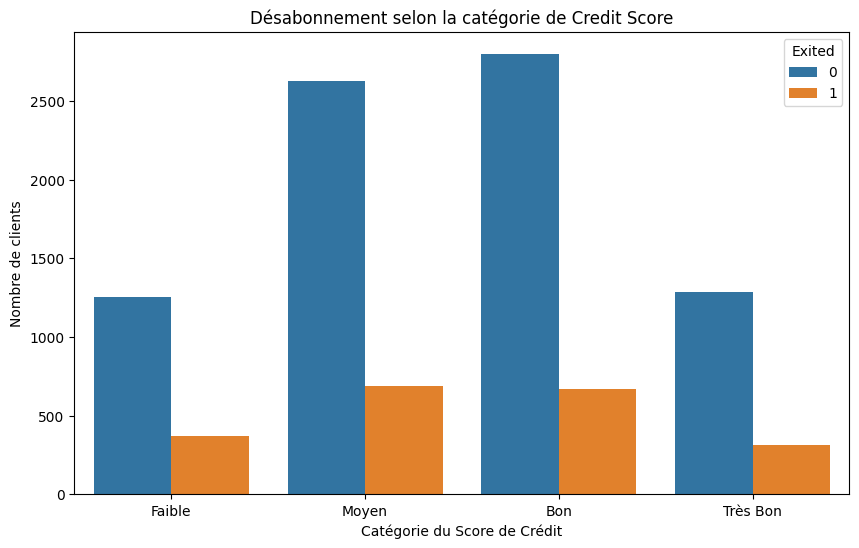

In [222]:
# On crée une colonne de catégories pour classer les scores de crédit
df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=[300, 550, 650, 750, 850],
                                   labels=['Faible', 'Moyen', 'Bon', 'Très Bon'])

plt.figure(figsize=(10,6))
sns.countplot(x='CreditScoreCategory', hue='Exited', data=df, palette=["#1f77b4", "#ff7f0e"])
plt.title("Désabonnement selon la catégorie de Credit Score")
plt.xlabel("Catégorie du Score de Crédit")
plt.ylabel("Nombre de clients")
plt.show()

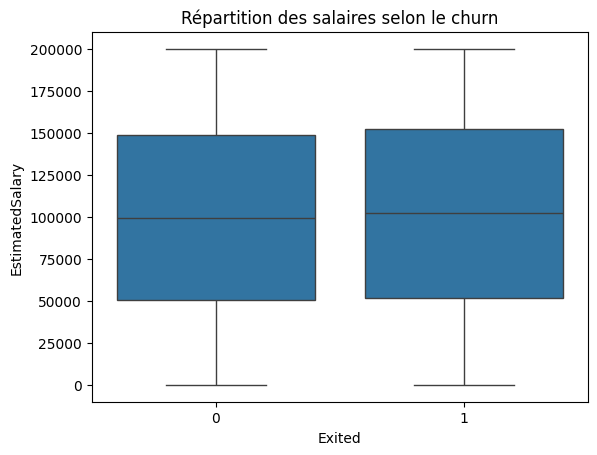

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title("Répartition des salaires selon le churn")
plt.show()


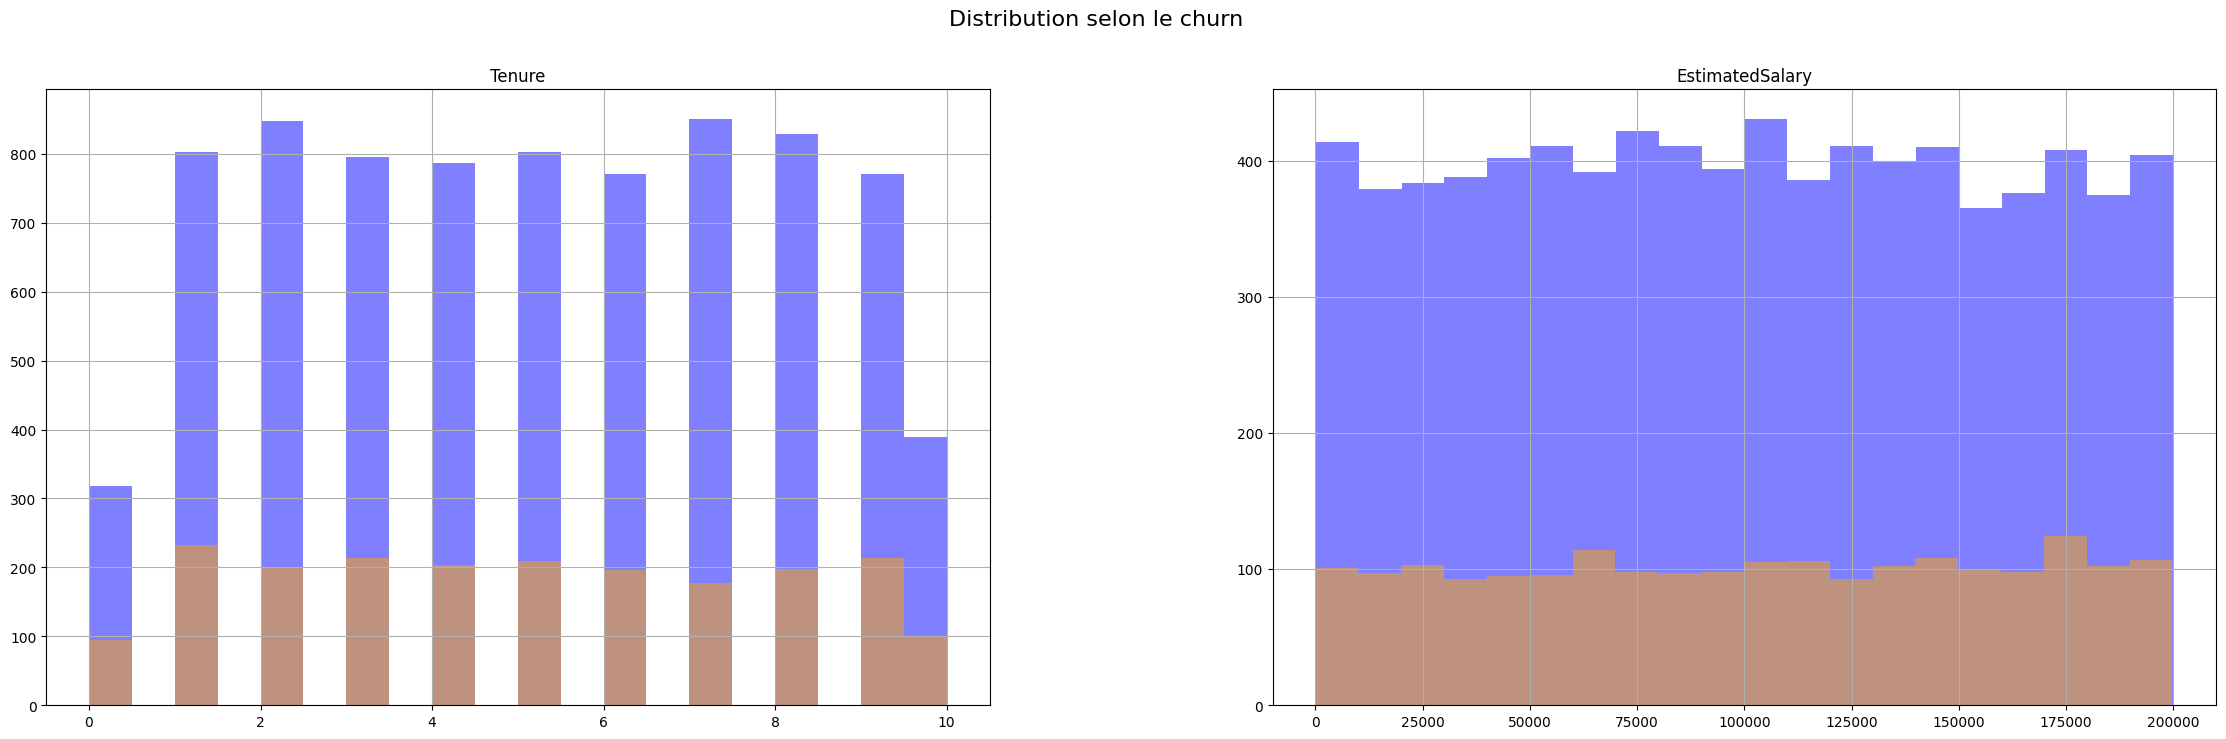

In [224]:
numericFeatures = ['Tenure', 'EstimatedSalary']

fig, ax = plt.subplots(1, 2, figsize=(28, 8))

df[df.Exited == 0][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Exited == 1][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

plt.suptitle("Distribution selon le churn", fontsize=16)
plt.show()

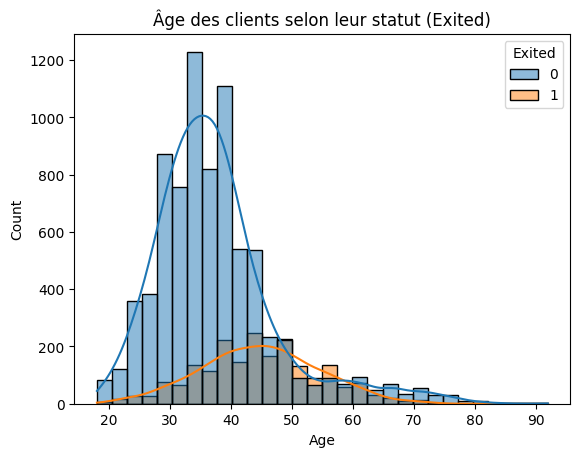

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour l'âge
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Âge des clients selon leur statut (Exited)')
plt.show()


**Analyse du churn selon le score de crédit et les caractéristiques des clients désabonnés**


 #### Caractéristiques des clients ayant quitté la banque


<ipython-input-226-7446eb836bd5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=churned, palette='Set2')


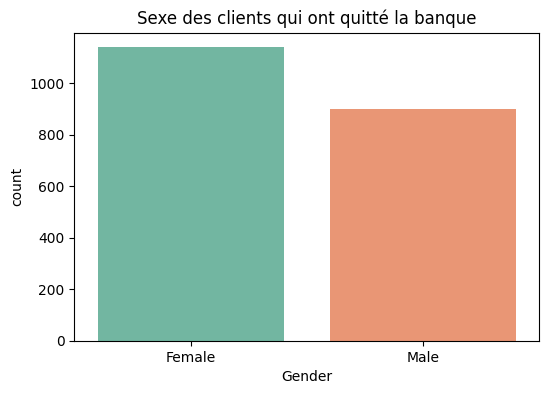

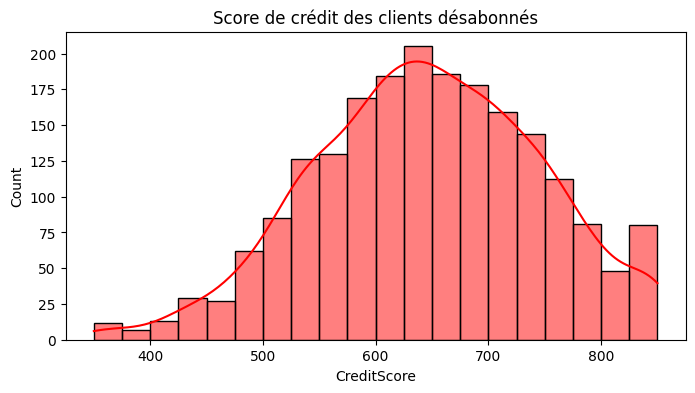

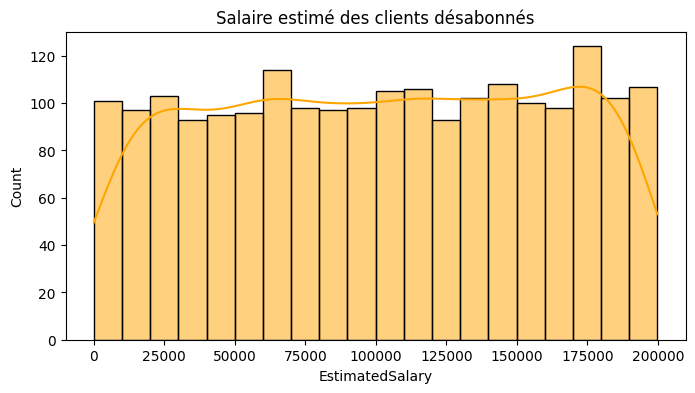

In [226]:
# Filtrer les clients qui sont partis
churned = df[df['Exited'] == 1]

# Répartition par sexe
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=churned, palette='Set2')
plt.title("Sexe des clients qui ont quitté la banque")
plt.show()

# Répartition par CreditScore
plt.figure(figsize=(8,4))
sns.histplot(churned['CreditScore'], bins=20, kde=True, color='red')
plt.title("Score de crédit des clients désabonnés")
plt.show()

# Répartition par salaire estimé
plt.figure(figsize=(8,4))
sns.histplot(churned['EstimatedSalary'], bins=20, kde=True, color='orange')
plt.title("Salaire estimé des clients désabonnés")
plt.show()


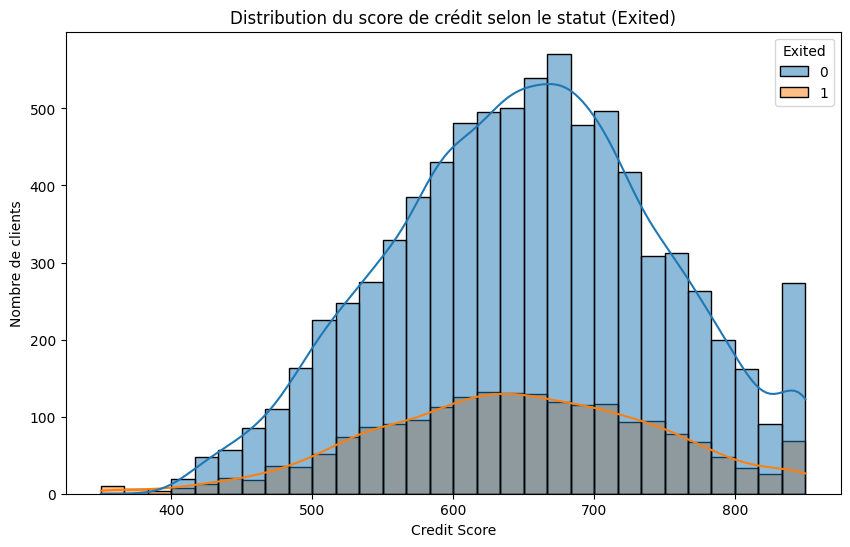

In [227]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', bins=30, kde=True)
plt.title("Distribution du score de crédit selon le statut (Exited)")
plt.xlabel("Credit Score")
plt.ylabel("Nombre de clients")
plt.show()

#### Taux de churn selon le sexe et le score de crédit

In [228]:
# Calcul du taux de churn moyen par sexe
churn_by_gender = df.groupby('Gender')['Exited'].mean() * 100
print("Taux de désabonnement par sexe :\n", churn_by_gender)

# Calcul du churn moyen selon les tranches de score de crédit
churn_by_credit = df.groupby('CreditScoreCategory')['Exited'].mean() * 100
print("\nTaux de désabonnement par score de crédit :\n", churn_by_credit)


Taux de désabonnement par sexe :
 Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

Taux de désabonnement par score de crédit :
 CreditScoreCategory
Faible      22.702036
Moyen       20.778046
Bon         19.249639
Très Bon    19.586984
Name: Exited, dtype: float64


<ipython-input-228-c0246e6e2aff>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_credit = df.groupby('CreditScoreCategory')['Exited'].mean() * 100


In [229]:
data = df.drop('CustomerId', axis=1)


In [230]:
data


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCategory
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Moyen
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Moyen
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Faible
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Bon
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Très Bon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Très Bon
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Faible
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Bon
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Très Bon


In [231]:
for column in data.columns:
  if data[column].dtype == np.number:
    continue
  data[column] = LabelEncoder().fit_transform(data[column])

<ipython-input-231-92b873c1eb99>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-231-92b873c1eb99>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-231-92b873c1eb99>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-231-92b873c1eb99>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-231-92b873c1eb99>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dt

In [232]:
data.dtypes

,0
Surname,int64
CreditScore,int64
Geography,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64


In [233]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCategory
0,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1,2
1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0,2
2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1,1
3,289,308,0,0,21,1,0.00,1,0,0,93826.63,0,0
4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0,3


In [234]:
x = data.drop('Exited', axis=1)
y = data['Exited']
x = StandardScaler().fit_transform(x)

In [235]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

#### Logisitic Regression

In [236]:
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [237]:
predictions = model.predict(xtest)

# print the predictions
print(predictions)

[0 0 0 ... 0 0 0]


In [238]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.61      0.19      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.77      2000



####  Random Forest

In [239]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)


In [240]:
print("\nRandom Forest")
print(classification_report(ytest, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

